## Group Project Proposal

## Heart Disease

## Introduction

<img align="left" src="https://domf5oio6qrcr.cloudfront.net/medialibrary/5042/n0318g16207256840245.jpg" width="200"/>

*image source: https://www.health.harvard.edu/heart-health/a-closer-look-at-heart-disease-risk*


TEXT 
TEXT

## Preliminary exploratory data analysis

**Loading R libraries**

In [42]:
### Run the R libraries 
library(repr)
library(tidyverse)
library(tidymodels)
options(repr.matrix.max.rows = 6) #limits output of dataframes to 6 rows

── Attaching packages ────────────────────────────────────── tidymodels 1.0.0 ──

✔ broom        1.0.0     ✔ rsample      1.0.0
✔ dials        1.0.0     ✔ tune         1.0.0
✔ infer        1.0.2     ✔ workflows    1.0.0
✔ modeldata    1.0.0     ✔ workflowsets 1.0.0
✔ parsnip      1.0.0     ✔ yardstick    1.0.0
✔ recipes      1.0.1     

── Conflicts ───────────────────────────────────────── tidymodels_conflicts() ──
✖ scales::discard() masks purrr::discard()
✖ dplyr::filter()   masks stats::filter()
✖ recipes::fixed()  masks stringr::fixed()
✖ dplyr::lag()      masks stats::lag()
✖ yardstick::spec() masks readr::spec()
✖ recipes::step()   masks stats::step()
• Use tidymodels_prefer() to resolve common conflicts.



**Reading the data into R**

In [43]:
cleveland_data <- read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/processed.cleveland.data", col_names = FALSE) 
       
colnames(cleveland_data) <- c("age", "sex", "cp", "trestbps", "chol", "fbs", "restecg", "thalach", "exang", "oldpeak", "slope", "ca","thal", "num")
cleveland_data <- cleveland_data |>
mutate(cp = as_factor(cp))

cleveland_data

Rows: 303 Columns: 14
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr  (2): X12, X13
dbl (12): X1, X2, X3, X4, X5, X6, X7, X8, X9, X10, X11, X14

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
<dbl>,<dbl>,<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<dbl>
63,1,1,145,233,1,2,150,0,2.3,3,0.0,6.0,0
67,1,4,160,286,0,2,108,1,1.5,2,3.0,3.0,2
67,1,4,120,229,0,2,129,1,2.6,2,2.0,7.0,1
⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮
57,1,4,130,131,0,0,115,1,1.2,2,1.0,7.0,3
57,0,2,130,236,0,2,174,0,0.0,2,1.0,3.0,1
38,1,3,138,175,0,0,173,0,0.0,1,?,3.0,0


**Filtering the na and all the missing values** 

In this dataset, we can see that only ca and thal columns has the header of chr and every other columns has dbl. It tells us that only ca and thal has the missing value which is represent by '?' in this dataset because '?' is a string. We can then filter the '?' out of these two columns, and use the drop_na() to make sure we drop all the na values.

In [46]:
filtered_data <- cleveland_data |>
filter(ca != "?", thal != "?")|>
drop_na()


filtered_data

age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
<dbl>,<dbl>,<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<dbl>
63,1,1,145,233,1,2,150,0,2.3,3,0.0,6.0,0
67,1,4,160,286,0,2,108,1,1.5,2,3.0,3.0,2
67,1,4,120,229,0,2,129,1,2.6,2,2.0,7.0,1
⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮
68,1,4,144,193,1,0,141,0,3.4,2,2.0,7.0,2
57,1,4,130,131,0,0,115,1,1.2,2,1.0,7.0,3
57,0,2,130,236,0,2,174,0,0.0,2,1.0,3.0,1


Then we can split the data into training and testing data

In [47]:
chest_pain_split <- initial_split(filtered_data, prop = 0.75, strata = cp)  
chest_pain_train <- training(chest_pain_split)   
chest_pain_test <- testing(chest_pain_split)

chest_pain_train
chest_pain_test

age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
<dbl>,<dbl>,<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<dbl>
63,1,1,145,233,1,2,150,0,2.3,3,0.0,6.0,0
48,1,2,110,229,0,0,168,0,1.0,3,0.0,7.0,1
49,1,2,130,266,0,0,171,0,0.6,1,0.0,3.0,0
⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮
59,1,4,164,176,1,2,90,0,1.0,2,2.0,6.0,3
57,0,4,140,241,0,0,123,1,0.2,2,0.0,7.0,1
68,1,4,144,193,1,0,141,0,3.4,2,2.0,7.0,2


age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
<dbl>,<dbl>,<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<dbl>
67,1,4,120,229,0,2,129,1,2.6,2,2.0,7.0,1
41,0,2,130,204,0,2,172,0,1.4,1,0.0,3.0,0
56,1,2,120,236,0,0,178,0,0.8,1,0.0,3.0,0
⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮
63,0,4,124,197,0,0,136,1,0.0,2,0.0,3.0,1
41,1,2,120,157,0,0,182,0,0.0,1,0.0,3.0,0
57,1,4,130,131,0,0,115,1,1.2,2,1.0,7.0,3


**Change the column type**

Once we clear the missing values we can make the ca and thal columns back to numeric.

In [51]:
type_train_data <- chest_pain_train |>
mutate(ca = as.numeric(ca), thal = as.numeric(thal))

type_test_data <- chest_pain_test |>
mutate(ca = as.numeric(ca), thal = as.numeric(thal))
type_train_data

age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
<dbl>,<dbl>,<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
63,1,1,145,233,1,2,150,0,2.3,3,0,6,0
48,1,2,110,229,0,0,168,0,1.0,3,0,7,1
49,1,2,130,266,0,0,171,0,0.6,1,0,3,0
⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮
59,1,4,164,176,1,2,90,0,1.0,2,2,6,3
57,0,4,140,241,0,0,123,1,0.2,2,0,7,1
68,1,4,144,193,1,0,141,0,3.4,2,2,7,2


**Summaize data**

**Discover the distribution of chest pain type**

In [54]:
counting_types <- type_train_data |>
group_by(cp)|>
summarize(types_count = n()) 

counting_types

cp,types_count
<fct>,<int>
1,16
2,37
3,60
4,108


**Visluazing data**

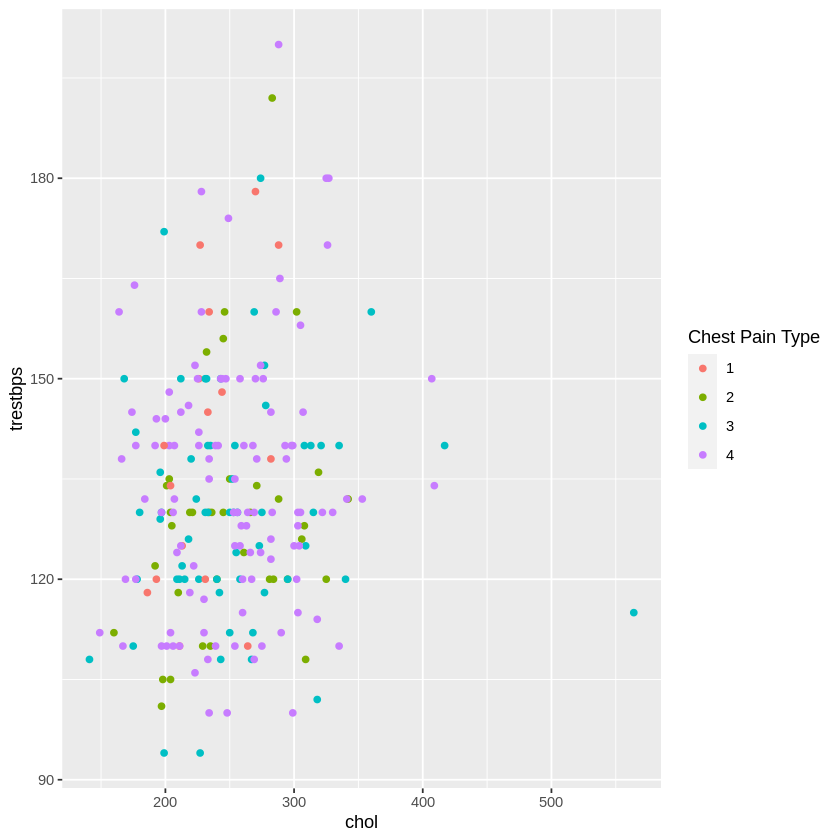

In [68]:
trestbps_vs_chol <- type_train_data |>
ggplot(aes(x = chol , y = trestbps, color = cp))+
geom_point()+
labs(x = "chol", y = "trestbps", color = "Chest Pain Type")
trestbps_vs_chol

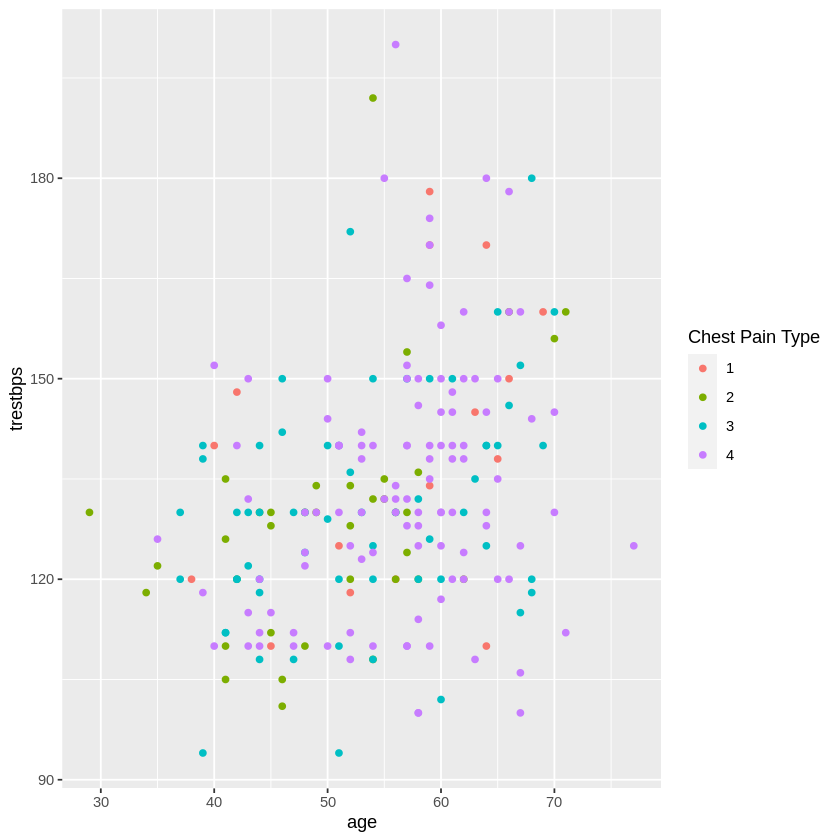

In [70]:
trestbps_vs_age <- type_train_data |>
ggplot(aes(x = age , y = trestbps, color = cp))+
geom_point()+
labs(x = "age", y = "trestbps", color = "Chest Pain Type")
trestbps_vs_age

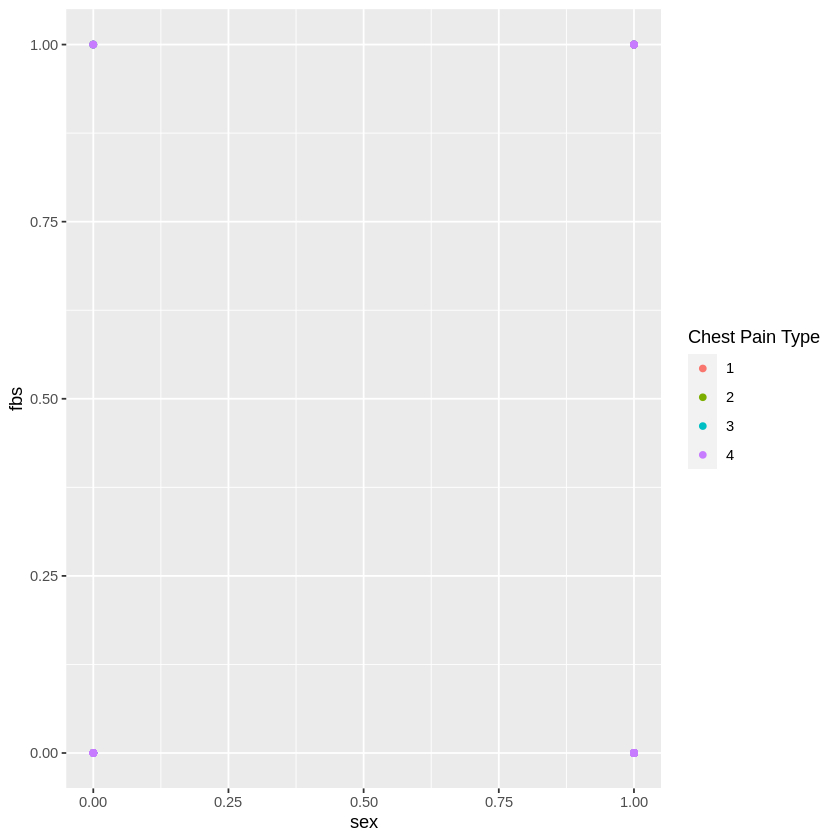

In [67]:
age_vs_fbs <- type_train_data |>
ggplot(aes(x = sex , y = fbs, color = cp))+
geom_point()+
labs(x = "sex", y = "fbs", color = "Chest Pain Type")
age_vs_fbs

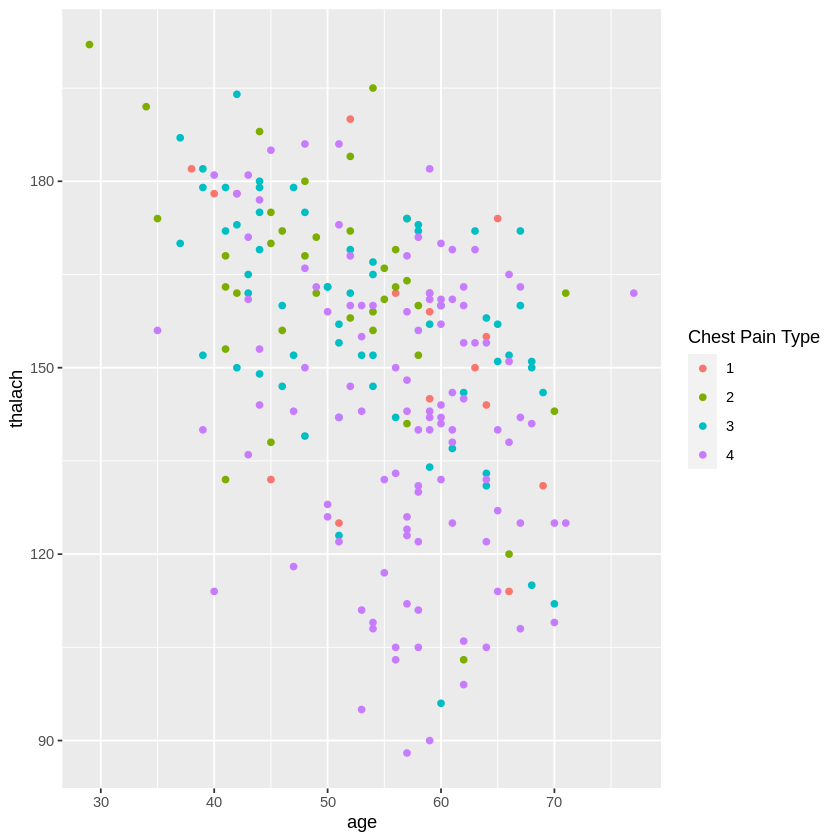

In [65]:
age_vs_thalach <- type_train_data |>
ggplot(aes(x = age , y = thalach, color = cp))+
geom_point()+
labs(x = "age", y = "thalach", color = "Chest Pain Type")
age_vs_thalach

## Methods

## Expected outcomes and significance